# Traffic Sign Classifier based on LeNet Architecture
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the German Traffic Sign data

In [1]:
# Load pickled data
import pickle
import cv2
from numpy import newaxis

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Original Image Shape: ",X_train[0].shape)

##### Preprocessing #####

def to_gray(colorimages):
    gray_images = []
    for image in colorimages:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray_images.append(gray)    
    return gray_images

def normalize(images):
    a = []
    for image in images:
        a.append((image-128)/255)
    return a

def shapeadjust(images):    
    a = []
    for x in images:
        a.append(x[...,newaxis])    
    return a

def rotation(images):
    rows,cols = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
    dst = cv2.warpAffine(img,M,(cols,rows))

# Convert images to gray
X_train = to_gray(X_train)
X_valid = to_gray(X_valid)
X_test = to_gray(X_test)

# Normalization of data
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

# Adjust the shape after conversion to grayscale
X_train = shapeadjust(X_train)
X_valid = shapeadjust(X_valid)
X_test = shapeadjust(X_test)
    
print("Image Shape gray: ",X_train[0].shape)
print()
print("Training Set:   ",len(X_train))
print("Validation Set: ",len(X_valid))
print("Test Set:       ",len(X_test))

Original Image Shape:  (32, 32, 3)
Image Shape gray:  (32, 32, 1)

Training Set:    34799
Validation Set:  4410
Test Set:        12630


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

6


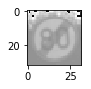

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap = 'gray')

print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [3]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [4]:
import tensorflow as tf

EPOCHS = 25
BATCH_SIZE = 256

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [5]:
from tensorflow.contrib.layers import flatten

def LeNet(x, dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    F1_w = tf.Variable(tf.truncated_normal(shape = (5,5,1,6), mean = mu, stddev = sigma))
    F1_b = tf.Variable(tf.zeros(6))
    c1 = tf.nn.conv2d(x, F1_w, strides = [1,1,1,1], padding = 'VALID') + F1_b
   
    # TODO: Activation.
    c1 = tf.nn.relu(c1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    p1 = tf.nn.max_pool(c1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    F2_w = tf.Variable(tf.truncated_normal(shape = (5,5,6,16), mean = mu, stddev = sigma))
    F2_b = tf.Variable(tf.zeros(16))   
    c2 = tf.nn.conv2d(p1, F2_w, strides = [1,1,1,1], padding = 'VALID') + F2_b
    
    # TODO: Activation.
    c2 = tf.nn.relu(c2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    p2 = tf.nn.max_pool(c2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flat_input = flatten(p2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    l3_weights = tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma))
    l3_bias = tf.Variable(tf.zeros(120))
    l3 = tf.matmul(flat_input,l3_weights) + l3_bias
        
    # TODO: Activation.
    l3 = tf.nn.relu(l3)
    
    # Dropout
    l3 = tf.nn.dropout(l3, dropout)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    l4_weights = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
    l4_bias = tf.Variable(tf.zeros(84))
    l4 = tf.matmul(l3,l4_weights) + l4_bias
        
    # TODO: Activation.
    l4 = tf.nn.relu(l4)
    
    # Dropout
    l4 = tf.nn.dropout(l4, dropout)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    l5_weights = tf.Variable(tf.truncated_normal(shape = (84,43), mean = mu, stddev = sigma))
    l5_bias = tf.Variable(tf.zeros(43))
    logits = tf.matmul(l4,l5_weights) + l5_bias
        
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [6]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) #dropout - keep probability
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [7]:
rate = 0.0005
dropout = 0.50

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [8]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    trainacc = []
    validacc = []    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:dropout})
        
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        validacc = validacc + [validation_accuracy]
        trainacc = trainacc + [training_accuracy]
    
    x_axis = list(range(1,EPOCHS+1))
    plt.plot(x_axis, trainacc, 'r-', label = "train")
    plt.plot(x_axis, validacc, 'b-', label = "valid")    
    plt.show()
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.054
Validation Accuracy = 0.048



KeyboardInterrupt: 

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
"""with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
"""